# Lending Club Case Study
We have a dataset with information related to loans given to multiple individuals. Identification of defaulters using EDA is the aim of this case study. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.<br>
First we will clean the data and make it ready for analysis.<br>
Later, we will analyse the cleaned data to identify the variables/features that are strong indicators of default<br>

### -------------------------------------------------------Data Cleaning---------------------------------------------------------
We clean this data in following order.<br>
<b>1) Dropping/imputing rows:</b><br>
 We will start with dropping/imputing rows rather than columns first because dropping rows may further increase null columns<br>
 We will either drop or impute rows for columns that have upto 30% nulls based on wether we are losing too many rows in the process<br>
 Finally, we will check for rows like totals, subtotals, headers, footers, page numbers, column numbers, blank rows, page numbers<br>

<b>2) Dropping columns:</b><br>
 We drop columns where number of null values>50%<br>
 For columns with 30-50% missing values, we will drop them if they are not important, else, we will see if we can impute them<br>
 Followed by, dropping columns where there is only one non-null value entire column because these columns are monotonous and donot provide diversity<br>
 Then, we will drop all columns that have all values as unique but are not numerically quantifiable and not useful for merging<br>
 Then, we will drop redundant colmns and keep only one column among each correlated set<br>

<b>3) Cleaning values:</b><br>
 At this point, we will start looking at individual columns and perform the following validations and changes.<br>
 Make sure datatypes are proper and valid<br>
 Standardise values, convert monetary columns to have only 2 values after decimal point<br>
 Remove suffixes like %<br>
 Convert dates to datetime format<br>
 Standardise to upper/lower case if needed<br>
 Correct any practically impossible values like loan granted> loan resquested or percentage>100 or loan approved date> current date<br>
 <br>
 <br>
 Note: We may still drop/ignore certain columns during analysis if they are not found to be useful

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#set low_memory=False because of dtype warning on column 47 - next_pymnt_d
df=pd.read_csv('loan.csv',low_memory=False)
#df.head()
df.shape#has 111 columns

(39717, 111)

<br>
<br>
<b>Row cleaning</b>: 
<br>
Let's identify columns that have null values > 0% and 
< 30% percentage

In [3]:
#print(df.isnull().sum() * 100 / df.shape[0])
#lets put null percentages for each column in a pandas series, later we can fetch whichever percentage list we want
null_percentage=df.isnull().sum() * 100 / df.shape[0]
#null_percentage

In [4]:
#extracting columns with null values >0% and less than 30%
null_percentage.loc[(null_percentage>0) & (null_percentage<30)]#emp_title has too many missing values

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [5]:
#list of columns with rows to be dropped
drop_list=(null_percentage.loc[(null_percentage>0) & (null_percentage<30)]).index.tolist()
#drop_list

In [6]:
#generic statistics about columns with some missing values
(df.loc[:,drop_list]).describe(include='all')
#dont see any columns that need to be completely removed yet, so we will drop null rows instead

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,37258,38642,39706,39667,39646,39715,39661.0,39661.0,39020.000000,39678.0
unique,28820,11,19615,1089,101,106,NaN,NaN,NaN,NaN
top,US Army,10+ years,Debt Consolidation,0%,May-16,May-16,NaN,NaN,NaN,NaN
freq,134,8879,2184,977,1256,10308,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.043260,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.204324,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0


In [7]:
df = df.dropna(axis=0, subset=drop_list)#dropping null rows for columns with null values between >0 and <30%
df.shape#rows reduced to 36431 from 39717, about 9% drop, which is acceptable

(36431, 111)

Row cleaning: Let's check if there are rows with totals, subtotals, headers, footers, page numbers, column numbers, blank rows, page numbers

In [8]:
#df.head()#identified primary keys 'id' and 'member_id'
df[['id','member_id']].count()#all values are unique and there are no blank fields, so there is no chance for the kinds of rows mentioned above.

id           36431
member_id    36431
dtype: int64

<br>
<br>
<b>Column cleaning</b>: <br>Dropping columns where number of null values>=50%

In [9]:
#len(null_percentage.loc[null_percentage>=50].index.tolist())#57 columns need to be dropped
df=df.drop(null_percentage.loc[null_percentage>=50].index.tolist(),axis=1)#dropping the columns with null values>=50%
df.shape#54 columns remaining

(36431, 54)

verifying columns where number of null values>=30% and <50%

In [10]:
null_percentage.loc[(null_percentage>=30) & (null_percentage<50)]#only one column named desc is found, lets analyse it

desc    32.580507
dtype: float64

In [11]:
df.desc=df.desc.str.lower()#converting to lower case
df.desc.describe()#has only 24406 entries, remaining are null.
#also 24178 of these are unique, which means 99% unique values
#with such a huge diversity, we can hardly make any analysis for any category, so we will drop it

count     24406
unique    24178
top            
freq        193
Name: desc, dtype: object

In [12]:
df=df.drop('desc',axis=1)#dropping the desc column
df.shape#53 columns remaining

(36431, 53)

Dropping columns where there is only one non-null value entire column

In [13]:
#first lets find the columns where there just one unique value
mono_list=(df.nunique().sort_values()).loc[df.nunique().sort_values()==1].index.tolist()
mono_list

['tax_liens',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'application_type',
 'policy_code',
 'collections_12_mths_ex_med',
 'initial_list_status',
 'pymnt_plan']

In [14]:
df=df.drop(mono_list,axis=1)#dropping all monotonous columns
df.shape#dimensions of the dataframe after dropping columns

(36431, 44)

Dropping columns that have all values as unique but are not numerically quantifiable and not useful for merging

In [15]:
#finding the columns that have all values as unique
diverse_list=(df.nunique().sort_values()).loc[df.nunique().sort_values()==len(df)].index.tolist()
diverse_list

['member_id', 'url', 'id']

In [16]:
df[diverse_list].head()#quick look at these columns

,member_id,url,id
1,1314167,https://lendingclub.com/browse/loanDetail.acti...,1077430
3,1277178,https://lendingclub.com/browse/loanDetail.acti...,1076863
4,1311748,https://lendingclub.com/browse/loanDetail.acti...,1075358
5,1311441,https://lendingclub.com/browse/loanDetail.acti...,1075269
6,1304742,https://lendingclub.com/browse/loanDetail.acti...,1069639


On checking the Data dictionary, member_id and id serve as identifiers/unique keys for merging with other data.<br>
However, we dont have other any additional data to merge with.<br>
'url' column is just a descriptor field.<br>
None of these 3 columns have any numerical or categorical significance, so we will drop them.<br>

In [17]:
df=df.drop(diverse_list,axis=1)#dropping all diverse columns
df.shape#dimensions of the dataframe after dropping columns

(36431, 41)

Dropping redundant columns, based on correlation table

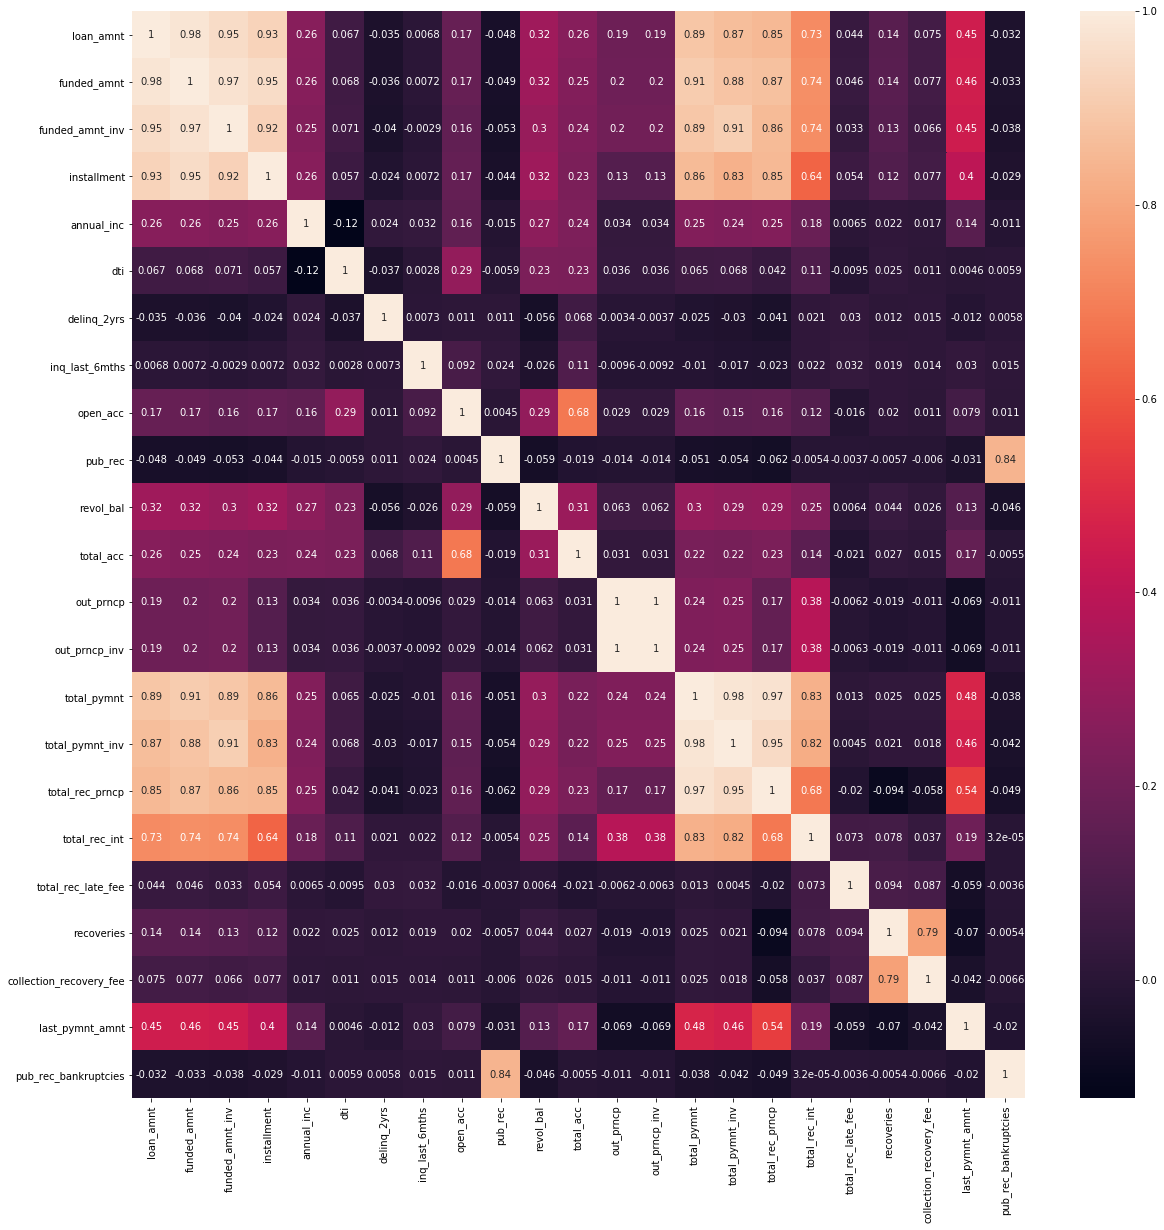

In [18]:
#let's look at correlation table for the columns, with this we can identify if certain columns show redundancy
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

plt.show()
#we can see correlation between (loan_amnt,funded_amnt,funded_amnt_inv,installment), (out_prncp,out_prncp_inv), (total_pymnt,total_pymnt_inv,total_rec_prncp)
#we can remove some of these in further steps

In [19]:
df.describe()#looking statistics for numeric fields

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36431.000000,36431.000000,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,...,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,11032.933491,10601.876895,326.187642,6.930694e+04,13.444293,0.146139,0.864840,9.351679,0.053663,...,52.216180,12311.226392,11841.691116,9912.631803,2304.442520,1.299912,92.852238,11.677622,2743.075381,0.041366
std,7433.904309,7166.520054,7072.645601,207.390058,6.354376e+04,6.643417,0.492211,1.063383,4.373724,0.234897,...,378.454016,9048.552965,8911.170172,7053.310578,2629.598904,7.065817,682.064837,140.884174,4473.621163,0.200100
min,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,5500.000000,5000.000000,168.900000,4.200000e+04,8.360000,0.000000,0.000000,6.000000,0.000000,...,0.000000,5672.634184,5413.880000,4800.000000,678.030000,0.000000,0.000000,0.000000,226.310000,0.000000
50%,10000.000000,10000.000000,9203.371902,283.280000,6.000000e+04,13.540000,0.000000,1.000000,9.000000,0.000000,...,0.000000,10101.589360,9632.410000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,15000.000000,14508.774540,432.220000,8.300000e+04,18.690000,0.000000,1.000000,12.000000,0.000000,...,0.000000,16700.865405,16094.780000,14000.000000,2891.865000,0.000000,0.000000,0.000000,3457.620000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [20]:
#Analysing loan_amnt,funded_amnt,funded_amnt_inv columns. We will keep installment seperately because its calculated based on one of these 3 values
#from the correlation map, we see that loan_amnt,funded_amnt and funded_amnt_inv columns are highly correlated, so we can keep one of them and drop others
#since funded_amnt is the actual amount given to customers but loan_amnt is approved but not given, we will keep funded_amnt and drop remaining 2
df=df.drop(['loan_amnt', 'funded_amnt_inv'],axis=1)#dropping the loan_amnt, funded_amnt_inv columns
print(df.shape)#dimensions of the dataframe after deleting columns

(36431, 39)


In [21]:
#out_prncp_inv has highest correlation with out_prncp, dropping this as its just redundancy
df=df.drop('out_prncp_inv',axis=1)#dropping the out_prncp_inv column
print(df.shape)#dimensions of the dataframe after deleting columns

(36431, 38)


In [22]:
#total_pymnt_inv has highest correlation with total_pymnt, dropping this as its just redundancy, also the payer may not even know the investor share to influence his decision
#we will keep total_rec_prncp seperate as total payment is derived from it
df=df.drop('total_pymnt_inv',axis=1)#dropping the total_pymnt_inv column
print(df.shape)#dimensions of the dataframe after deleting columns

(36431, 37)


<br>
<br>
<br>
<b>Cleaning values:</b>
<br>
Cleaning each column following the rules mentioned above

In [23]:
print(len(df.columns))#37 columns remaining
#df.columns#columns list
pd.set_option('display.max_columns', 37)#increased the size of display so that we can see all of 37 columns in one go

37


In [24]:
df.describe(include='all')#metrics for remaining columns

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,36431.000000,36431,36431,36431.000000,36431,36431,36431,36431,36431,3.643100e+04,36431,36431,36431,36431,36431,36431,36431,36431.000000,36431.000000,36431,36431.000000,36431.000000,36431.000000,36431.000000,36431,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431,36431.000000,36431,36431.000000
unique,NaN,2,333,NaN,7,35,28205,11,4,NaN,3,51,3,14,17952,805,48,NaN,NaN,510,NaN,NaN,NaN,NaN,1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,96,NaN
top,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,NaN
freq,NaN,26375,901,NaN,11035,2674,131,8407,17464,NaN,15054,2126,30423,17468,2064,540,6536,NaN,NaN,353,NaN,NaN,NaN,NaN,852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1174,NaN,9626,NaN
mean,11032.933491,NaN,NaN,326.187642,NaN,NaN,NaN,NaN,NaN,6.930694e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.444293,0.146139,NaN,0.864840,9.351679,0.053663,13466.188740,NaN,22.246137,52.468572,12311.226392,9912.631803,2304.442520,1.299912,92.852238,11.677622,NaN,2743.075381,NaN,0.041366
std,7166.520054,NaN,NaN,207.390058,NaN,NaN,NaN,NaN,NaN,6.354376e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.643417,0.492211,NaN,1.063383,4.373724,0.234897,15702.347369,NaN,11.376630,379.861072,9048.552965,7053.310578,2629.598904,7.065817,682.064837,140.884174,NaN,4473.621163,NaN,0.200100
min,500.000000,NaN,NaN,16.080000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,33.730000,0.000000,6.220000,0.000000,0.000000,0.000000,NaN,0.010000,NaN,0.000000
25%,5500.000000,NaN,NaN,168.900000,NaN,NaN,NaN,NaN,NaN,4.200000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.360000,0.000000,NaN,0.000000,6.000000,0.000000,3832.000000,NaN,14.000000,0.000000,5672.634184,4800.000000,678.030000,0.000000,0.000000,0.000000,NaN,226.310000,NaN,0.000000
50%,10000.000000,NaN,NaN,283.280000,NaN,NaN,NaN,NaN,NaN,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.540000,0.000000,NaN,1.000000,9.000000,0.000000,9031.000000,NaN,21.000000,0.000000,10101.589360,8123.600000,1379.820000,0.000000,0.000000,0.000000,NaN,571.700000,NaN,0.000000
75%,15000.000000,NaN,NaN,432.220000,NaN,NaN,NaN,NaN,NaN,8.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.690000,0.000000,NaN,1.000000,12.000000,0.000000,17231.500000,NaN,29.000000,0.000000,16700.865405,14000.000000,2891.865000,0.000000,0.000000,0.000000,NaN,3457.620000,NaN,0.000000


In [25]:
#df.funded_amnt.head()#analysing funded_amnt column, no cleaning required
df.funded_amnt.dtype

dtype('int64')

In [26]:
#analysing term column
df.term.value_counts()#we will keep this column as it has only 2 categories and both of them have significant number of samples
#no need to convert to numerics as there are only 2 categories whose performance can be measured side by side on plots

 36 months    26375
 60 months    10056
Name: term, dtype: int64

In [27]:
#analysing int_rate field
#df.int_rate.head()
df.int_rate=df.int_rate.str.replace('%','').astype('float')#removing % and converting to float so that we can check default rate as int_rate increases
#df.int_rate.head()

In [28]:
#analysing multiple columns

#print(df.installment.head())
print(df.installment.dtype)#float type, no changes needed
#df.installment.plot.box()#dont see any outliers

#print(df.grade.head())#will retain this column
#print(df.grade.value_counts())

#print(df.sub_grade.head())#will retain this column
#print(df.sub_grade.value_counts())

float64


In [29]:
#analysing emp_title
df.emp_title=df.emp_title.str.lower()#converting to lower case
print(len(set(df.emp_title))/len(df.emp_title))#73% of the values are unique, which means there are too many categories in the whole column
print(df.emp_title.value_counts()[0]/len(set(df.emp_title)))#top most frequent job title(US army) has less than 0.8% entries, which means even the top most category has too little presence in the entries
#we will drop this column as it has too many diverse categories that have very limited occurance and hance cannot be useful for categorical analytics
df=df.drop('emp_title',axis=1)#dropping the emp_title column
print(df.shape)#dimensions of the dataframe after deleting column

0.73720183360325
0.007670253565178538
(36431, 36)


In [30]:
#analysing emp_length
#print(df.emp_length.value_counts())#these values can be converted to integers so that we can see how default pattern changes with increase in employment years
#creating a key value pair so that we can use numbers instead of strings to represent number fo years of employment
emp_length = {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10}
df['emp_length']= df['emp_length'].map(emp_length)#converted string to numeric values
#print(df.emp_length.value_counts())
df['emp_length']=df['emp_length'].astype(int)
df['emp_length'].dtype

dtype('int32')

In [31]:
#print(df.home_ownership.value_counts())#will retain this column

#print(df.annual_inc.head())
print(df.annual_inc.dtype)#will retain this column

#print(df.verification_status.value_counts())#will retain this column


float64


In [32]:
#analysing issue_d
print(df.issue_d.head())#this represents a date value. but we need to convert it to datetime format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
#df['last_pymnt_d'].dt.year.value_counts()#dont see any future dates

1    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
Name: issue_d, dtype: object


In [33]:
print(df.loan_status.value_counts())#this is the main column that gives the current status of the loan
#print(df.purpose.value_counts())#will retain this column

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64


In [34]:
#analysing title
df.title=df.title.str.lower()#converting to lower case
print(df.title.describe())#44% values are unique
#df.title.head()#seems like these are hand typed by customers and hence cannot be used as categories
#we will drop this column
df=df.drop('title',axis=1)#dropping the title column
print(df.shape)#dimensions of the dataframe after deleting column


count                  36431
unique                 16180
top       debt consolidation
freq                    2901
Name: title, dtype: object
(36431, 35)


In [35]:
df.zip_code.value_counts()#the zip codes are masked and provide only state details, but this can be generated from next column called addr_state, so we will drop this
df=df.drop('zip_code',axis=1)#dropping the zip_code column
print(df.shape)#dimensions of the dataframe after deleting column

(36431, 34)


In [36]:
df.addr_state.head()#no changes needed
df.dti.dtype#float type, no changes needed
df.delinq_2yrs.dtype#integer type, no changes needed
#df.delinq_2yrs.value_counts()

dtype('int64')

In [37]:
#analysing earliest_cr_line
print(df.earliest_cr_line.head())#this represents a date value. but we need to convert it to datetime format
#we have 3 character month which is represented by 'b', we dont use 'm' because it is for 2 digit representation
#year will be represented by y because its 2 digit, for 4 digit we can use 'Y'
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
#print(df.earliest_cr_line.value_counts())
print(sorted(df['earliest_cr_line'].dt.year.value_counts().index.tolist()))#we see some future dates from 2046...need to fix this, the system is taking values before 68 as future dates rather than past dates
#lets deduct 100 for any dates that are greater than 2016 as it is the maximum year that we saw in other fields

from dateutil.relativedelta import relativedelta

df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda x: x- relativedelta(years=100) if x.year>2016 else x)

print(sorted(df['earliest_cr_line'].dt.year.value_counts().index.tolist()))#after adjusting date

1    Apr-99
3    Feb-96
4    Jan-96
5    Nov-04
6    Jul-05
Name: earliest_cr_line, dtype: object
[1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2046, 2050, 2054, 2056, 2062, 2063, 2064, 2065, 2066, 2067, 2068]
[1946, 1950, 1954, 1956, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]


In [38]:
df.inq_last_6mths.dtype#int type, no changes needed
df.open_acc.dtype#int type, no changes needed
df.pub_rec.head()#int type, no changes needed
df.revol_bal.dtype#int type, no changes needed

dtype('int64')

In [39]:
#analysing revol_util
print(df.revol_util.head())#this represents a numerical value. but we need to remove trailing % and convert to float so that we can perform mathematical operations
df.revol_util=df.revol_util.str.replace('%','').astype('float')
#df.revol_util.head()

1     9.40%
3       21%
4    53.90%
5    28.30%
6    85.60%
Name: revol_util, dtype: object


In [40]:
df.total_acc.dtype#int type, no changes needed
df.out_prncp.dtype#int type, no changes needed

dtype('float64')

In [41]:
#df.total_pymnt.head(10)#float type, but has more than 2 values after decimal
#rounding off to 2 decimals
df.total_pymnt= df.total_pymnt.apply(lambda x: round(x,2))
#df.total_pymnt.head(10)

In [42]:
df.total_rec_prncp.dtype#float type, no changes needed
df.total_rec_int.dtype#float type, no changes needed
df.total_rec_late_fee.dtype#float type, no changes needed
df.recoveries.dtype#float type, no changes needed
df.collection_recovery_fee.dtype#float type, no changes needed

dtype('float64')

In [43]:
#analysing last_pymnt_d
print(df.last_pymnt_d.head())#this represents a date value. but we need to convert it to datetime format
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
#df['last_pymnt_d'].dt.year.value_counts()#dont see any future dates

1    Apr-13
3    Jan-15
4    May-16
5    Jan-15
6    May-16
Name: last_pymnt_d, dtype: object


In [44]:
df.last_pymnt_amnt.dtype#float type, no changes needed

dtype('float64')

In [45]:
#analysing last_credit_pull_d
print(df.last_credit_pull_d.head())#this represents a date value. but we need to convert it to datetime format
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
#df['last_pymnt_d'].dt.year.value_counts()#dont see any future dates

1    Sep-13
3    Apr-16
4    May-16
5    Jan-16
6    May-16
Name: last_credit_pull_d, dtype: object


In [46]:
df.pub_rec_bankruptcies.dtype#float
df.pub_rec_bankruptcies.unique()#we will keep this column

array([0., 1., 2.])

### ----------------------------------------------End of Data Cleaning---------------------------------------------------------

### ---------------------------------------------Data Analysis - Part 1----------------------------------------------------------

 The aim of this analysis is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.<br>
 For each feature or column, we have to check how it affects the repaying ability of the customer. The repaying ability is denoted by 'Fully Paid' or 'Charged Off'. 'Current' is a transaction still in progress and cannot give definitive status.<br>
 While analysing, we have to keep in mind that we have to only rely on features that will be already available before approving loan. Those that are not generated until after loan is given will not be useful as the decision has to be taken before loan approval.<br>
 We create couple of functions that can be reused for the purpose of plotting and analysis for most columns.<br>
 
 <b>Note</b>: We will use stacked bar plots with counts and proportions in the analysis. The overall height of the stack give univariate analysis of that feature while segments give bivariate analysis. Also proportions represent percentages.

In [47]:
df.columns#columns that we are left with after cleaning

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

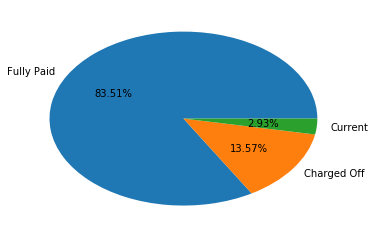

In [48]:
#let's see what percentage of data is current using a pie chart
#df..plot.pie(y='loan_status')
df['loan_status'].value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

#only 2.93% of the data is current, so lets ignore that data for our analysis

In [49]:
#let's create a new dataframe with completed loans which is a subset of cleaned data excluding 'Current' loans
compl_loan=pd.DataFrame(df.loc[df.loan_status!='Current'])
compl_loan.shape#rows dropped from 36431 to 35365

(35365, 34)

Creating function to plot univariate and bi-variate(w.r.t loan status) for any inputted <ins>continous</ins> column with box plot

In [50]:
def uni_bi(df,df_col,col,xlab):#df=dataframe, df_col=df.column_name, col=column name, xlab=xlabel
    plt.figure(figsize=(15, 2))
    df_col.plot.box(vert=False)
    plt.show()
    
    plt.figure(figsize=(15, 2))
    sns.set_style(style="darkgrid")
    sns.boxplot( y="loan_status", x=col , data=df)#horizantal box plots
    plt.xlabel(xlab)
    plt.ylabel('Loan Status')
    plt.show()#median comparison of defaulters vs non-defaulters

Creating function to plot univariate and bi-variate(w.r.t loan status) for any inputted <ins>discrete</ins> column with stacked bar plot

In [51]:
def cat_analysis(dframe,inx,xlab,rot=0):
    #creating a dataframe with counts of statuses for each type of index
    count_table = pd.pivot_table(dframe, values='int_rate', index=[inx],
                    columns=['loan_status'], aggfunc='count')#int_rate is used so that we can calculate count wrt to it
    if set(count_table.index.tolist())==set(['VL','L','M','H','VH']):#for binned data, reorganize indexes
        count_table=count_table.reindex(['VL','L','M','H','VH'])#re indexing to follow the ascending order of ranges
    
    print("Category distribution against each type of loan status\n")
    print(count_table)
    print("\n======================================")
    print("Plots")


    plt.figure(figsize=(15, 10))
    #plotting counts of loan status by stacking them on top of each other
    count_table.plot(kind="bar", stacked=True)
    plt.title("loans status counts stacked for each type of "+inx, fontsize=14)
    plt.ylabel("Count of loans", fontsize=14)
    plt.xlabel(xlab,fontsize=14)
    plt.xticks(fontsize=14,rotation=rot)
    plt.show()
    
    plt.figure(figsize=(15, 10))
    #plotting proportions of loan status by stacking them on top of each other
    ct_proportion=count_table.apply(lambda x: x/x.sum(), axis=1)
    ct_proportion.plot(kind="bar", stacked=True)
    plt.title("loans status proportions for each type of "+inx, fontsize=14)
    plt.ylabel("loan status proportion", fontsize=14)
    plt.xlabel(xlab,fontsize=14)
    plt.xticks(fontsize=14,rotation=rot)
    plt.show()
    
    #percentage of charged off loans for each type of category in the feature inputted
    print("\n======================================")
    print("Percentage of default for each category")
    print(round(count_table['Charged Off']/count_table.sum(axis=1)*100,2))
    

--------------
<br>Column: funded_amnt<br>
The total amount committed to that loan at that point in time.

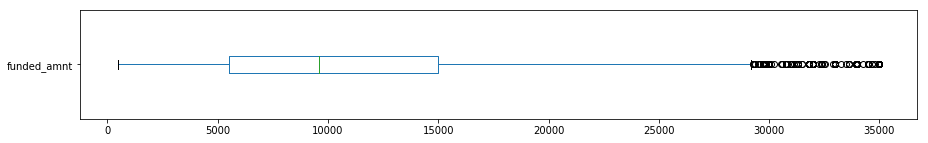

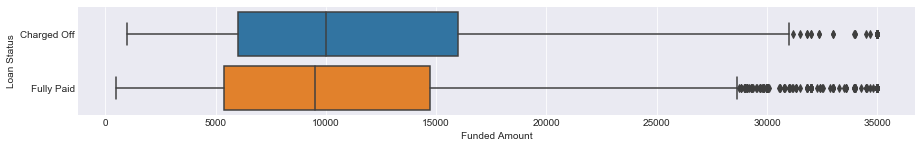

In [52]:
compl_loan.funded_amnt.head()#this is a continous field, don't see any outliers
#performing univariate and bivariate analysis(w.r.t loan status) for continous variables with box plots
uni_bi(compl_loan,compl_loan.funded_amnt,'funded_amnt','Funded Amount')
#we dont see much difference in these distributions
#it's better to convert funded_amnt to sections/bins to better understand proportion of default for each section

In [53]:
#converting funded_amnt into bins(very low to very high, changing for every 20%) for better understanding
compl_loan['funded_amnt_bins'], compl_bins = pd.cut(compl_loan.funded_amnt, bins=5, labels=['VL','L','M','H','VH'], retbins=True)
compl_bins#ranges over which bins are spread between minimum and maximum

array([  465.5,  7400. , 14300. , 21200. , 28100. , 35000. ])

Category distribution against each type of loan status

loan_status       Charged Off  Fully Paid
funded_amnt_bins                         
VL                       1672       11853
L                        1607       10637
M                        1048        5373
H                         193         710
VH                        422        1850

Plots


<Figure size 1080x720 with 0 Axes>

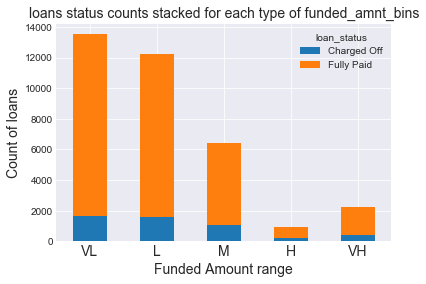

<Figure size 1080x720 with 0 Axes>

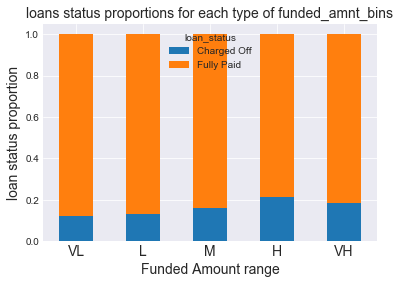


Percentage of default for each category
funded_amnt_bins
VL    12.36
L     13.12
M     16.32
H     21.37
VH    18.57
dtype: float64


In [54]:
cat_analysis(compl_loan,'funded_amnt_bins','Funded Amount range',0)

Key takeaway: Funded amount increases default rate is also increasing. However, difference between default rates of highest(28100. , 35000) and lowest  bin(465.5,  7400) defaults is 6%

--------------
<br>Column: term<br>
The number of payments on the loan. Values are in months and can be either 36 or 60.

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
term                                
 36 months          2729       23646
 60 months          2213        6777

Plots


<Figure size 1080x720 with 0 Axes>

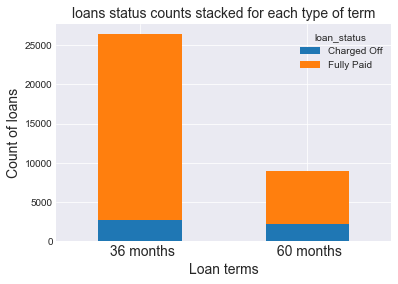

<Figure size 1080x720 with 0 Axes>

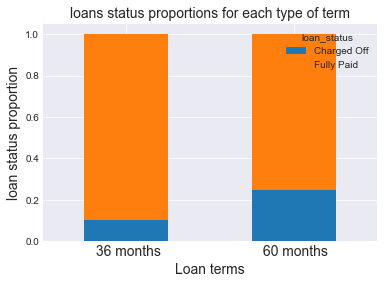


Percentage of default for each category
term
 36 months    10.35
 60 months    24.62
dtype: float64


In [55]:
#this is a categorical field
cat_analysis(compl_loan,'term','Loan terms',0)#analysing with the help of function

Key takeaway: 60 months term seems to be more likely to be defaulted(twice as much). There is a 14% difference in default rate.

--------------
<br>Column: int_rate<br>
Interest Rate on the loan

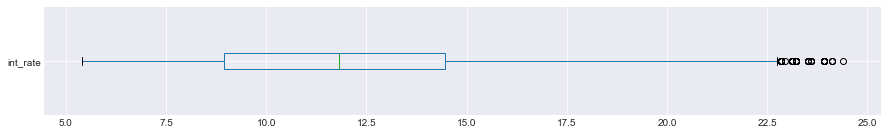

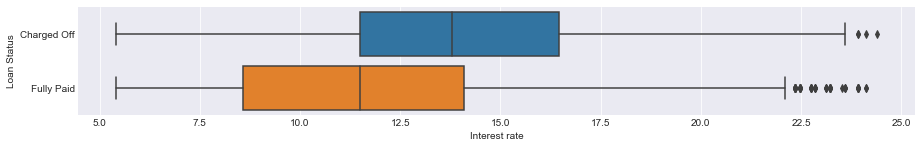

In [56]:
compl_loan.funded_amnt.head()#this is a continous field, don't see any outliers
#performing univariate and bivariate analysis(w.r.t loan status) for continous variables with box plots
uni_bi(compl_loan,compl_loan.int_rate,'int_rate','Interest rate')
#the average interest rates of charged off loans seems to be visibly higher than fully paid one, but, 
#it's better to convert funded_amnt to sections/bins to better understand proportion of default for each section

In [57]:
#converting int_rate into bins(very low to very high, changing for every 20%) for better understanding

compl_loan['int_rate_bins'], int_bins = pd.cut(compl_loan.int_rate, bins=5, labels=['VL','L','M','H','VH'], retbins=True)

int_bins#ranges over which bins are spread between minimum and maximum

array([ 5.40102,  9.216  , 13.012  , 16.808  , 20.604  , 24.4    ])

Category distribution against each type of loan status

loan_status    Charged Off  Fully Paid
int_rate_bins                         
VL                    1567       11273
L                      887        2254
M                      496        8407
H                     1793        8184
VH                     199         305

Plots


<Figure size 1080x720 with 0 Axes>

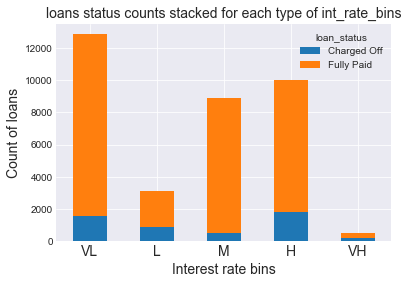

<Figure size 1080x720 with 0 Axes>

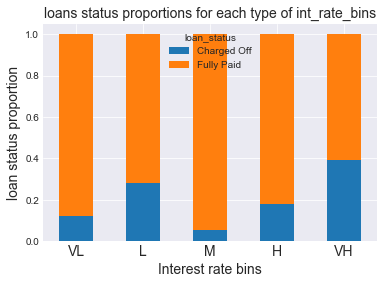


Percentage of default for each category
int_rate_bins
VL    12.20
L     28.24
M      5.57
H     17.97
VH    39.48
dtype: float64


In [58]:
cat_analysis(compl_loan,'int_rate_bins','Interest rate bins',0)

Key takeaway: Interest rates in the medium range(13% to 16%) have the lest default rates and hence preferable.

--------------
<br>Column: installment<br>
The monthly payment owed by the borrower if the loan originates.

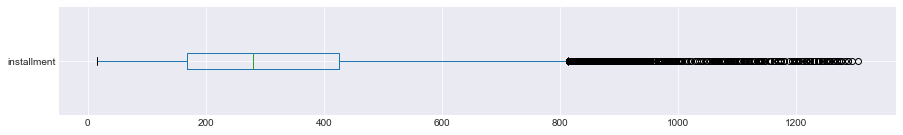

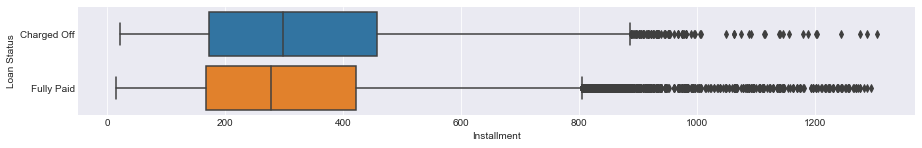

In [59]:
compl_loan.installment.head()#this is a continous field, don't see any outliers
#performing univariate and bivariate analysis(w.r.t loan status) for continous variables with box plots
uni_bi(compl_loan,compl_loan.installment,'installment','Installment')
#the average installments of charged off loans seems to be visibly higher than fully paid one, but, 
#it's better to convert installment to sections/bins to better understand proportion of default for each section

In [60]:
#converting installment into bins(very low to very high, changing for every 20%) for better understanding
compl_loan['installment_bins'], inst_bins = pd.cut(compl_loan.installment, bins=5, labels=['VL','L','M','H','VH'], retbins=True)
inst_bins#ranges over which bins are spread between minimum and maximum
#print(compl_loan.installment.min())

array([  14.79089,  273.902  ,  531.724  ,  789.546  , 1047.368  ,
       1305.19   ])

Category distribution against each type of loan status

loan_status       Charged Off  Fully Paid
installment_bins                         
VL                       2241       14955
L                        1868       11111
M                         577        3092
H                         236        1099
VH                         20         166

Plots


<Figure size 1080x720 with 0 Axes>

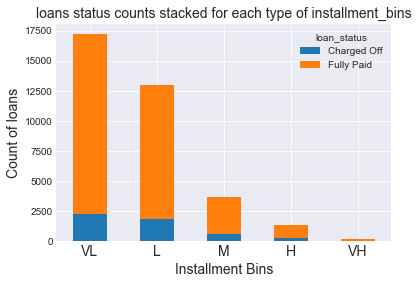

<Figure size 1080x720 with 0 Axes>

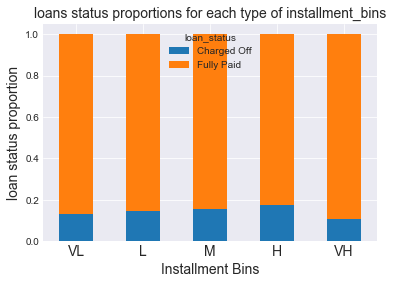


Percentage of default for each category
installment_bins
VL    13.03
L     14.39
M     15.73
H     17.68
VH    10.75
dtype: float64


In [61]:
cat_analysis(compl_loan,'installment_bins','Installment Bins',0)

Key takeaway: Default percentage increases as Installment amount increases. But difference between VL and H bins is only 4%. We ignore VH bin as it has too few entries.

--------------
<br>Column: grade<br>
LC assigned loan grade

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                    513        8627
B                   1253        9465
C                   1169        6011
D                    980        3682
E                    648        1833
F                    286         616
G                     93         189

Plots


<Figure size 1080x720 with 0 Axes>

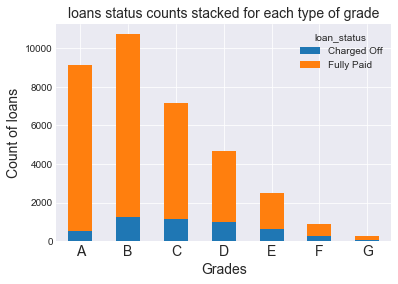

<Figure size 1080x720 with 0 Axes>

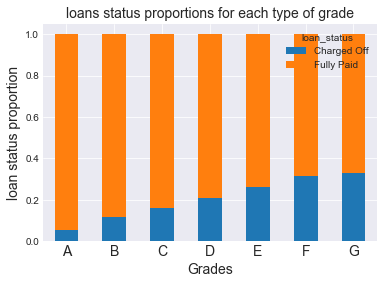


Percentage of default for each category
grade
A     5.61
B    11.69
C    16.28
D    21.02
E    26.12
F    31.71
G    32.98
dtype: float64


In [62]:
#this is a categorical field
cat_analysis(compl_loan,'grade','Grades',0)#analysing with the help of function

Key takeaway: Going from A-G, percentage of default increases about 5% for every next grade

--------------
<br>Column: sub_grade<br>
LC assigned loan subgrade

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
sub_grade                           
A1                    23         982
A2                    63        1293
A3                    80        1550
A4                   158        2504
A5                   189        2298
B1                   141        1472
B2                   191        1634
B3                   307        2282
B4                   283        1964
B5                   331        2113
C1                   288        1586
C2                   282        1509
C3                   236        1133
C4                   182         912
C5                   181         871
D1                   141         704
D2                   236         948
D3                   227         795
D4                   192         656
D5                   184         579
E1                   185         506
E2                   147         419
E3                   105         377
E4                 

<Figure size 1080x720 with 0 Axes>

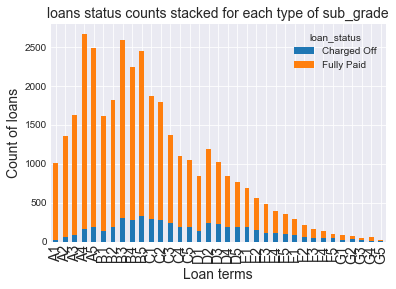

<Figure size 1080x720 with 0 Axes>

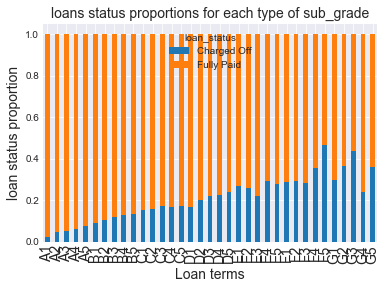


Percentage of default for each category
sub_grade
A1     2.29
A2     4.65
A3     4.91
A4     5.94
A5     7.60
B1     8.74
B2    10.47
B3    11.86
B4    12.59
B5    13.54
C1    15.37
C2    15.75
C3    17.24
C4    16.64
C5    17.21
D1    16.69
D2    19.93
D3    22.21
D4    22.64
D5    24.12
E1    26.77
E2    25.97
E3    21.78
E4    29.19
E5    27.59
F1    28.67
F2    29.44
F3    28.12
F4    35.29
F5    46.46
G1    29.55
G2    36.49
G3    43.90
G4    24.07
G5    36.00
dtype: float64


In [63]:
#this is a categorical field
cat_analysis(compl_loan,'sub_grade','Loan terms',90)#analysing with the help of function


Key takeaway: Going from A-G sub-grades, percentage of default increases drastically. However, we have far too few samples for each sub-grade, so let's ignore it.

--------------
<br>Column: emp_length<br>
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
emp_length                          
0                    530        3448
1                    408        2551
2                    528        3553
3                    521        3312
4                    427        2779
5                    422        2621
6                    287        1775
7                    248        1390
8                    191        1170
9                    147        1029
10                  1233        6795

Plots


<Figure size 1080x720 with 0 Axes>

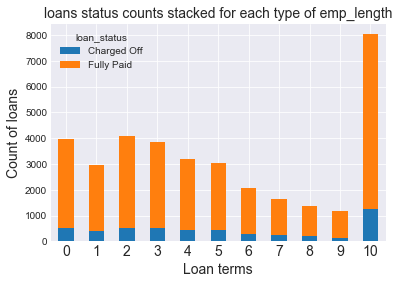

<Figure size 1080x720 with 0 Axes>

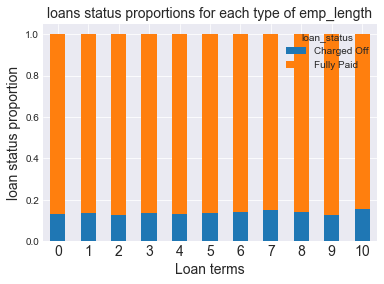


Percentage of default for each category
emp_length
0     13.32
1     13.79
2     12.94
3     13.59
4     13.32
5     13.87
6     13.92
7     15.14
8     14.03
9     12.50
10    15.36
dtype: float64


In [64]:
#this is a categorical field
cat_analysis(compl_loan,'emp_length','Loan terms',0)#analysing with the help of function

Key takeaway: Percentage of default doesnt seem to depend on years of experience

--------------
<br>Column: home_ownership<br>
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

Category distribution against each type of loan status

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2061       13640
OTHER                    18          76
OWN                     346        2159
RENT                   2517       14548

Plots


<Figure size 1080x720 with 0 Axes>

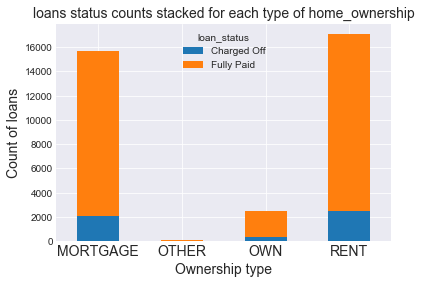

<Figure size 1080x720 with 0 Axes>

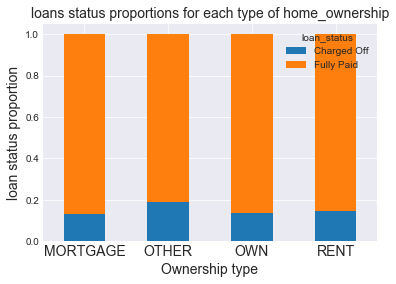


Percentage of default for each category
home_ownership
MORTGAGE    13.13
OTHER       19.15
OWN         13.81
RENT        14.75
dtype: float64


In [65]:
#this is a categorical field
cat_analysis(compl_loan,'home_ownership','Ownership type',0)#analysing with the help of function


Key takeaway: Defualt rates are almost same for Mortgage, Own and Rent but higher for  Other. But Other has very few samples. Hence,we can say that Percentage of default doesnt seem to depend on type of home ownership

--------------
<br>Column: annual_inc<br>
The self-reported annual income provided by the borrower during registration.

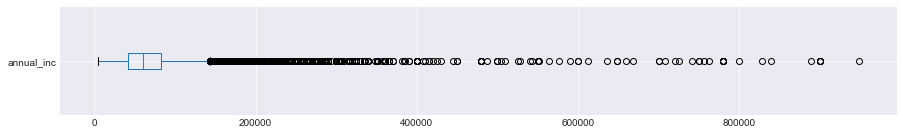

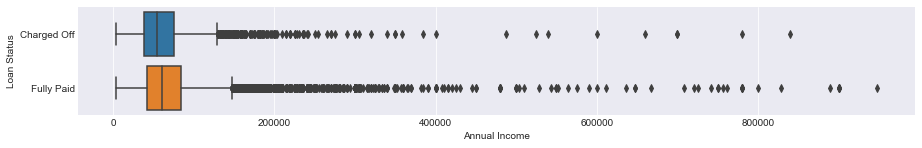

35352

In [66]:
compl_loan.annual_inc.head()#this is a continous field
#performing univariate and bivariate analysis(w.r.t loan status) for continous variables with box plots
#uni_bi(compl_loan,compl_loan.annual_inc,'annual_inc','Annual Income')#seeing outlier, will consider incomes below 2 Million
df_slice=pd.DataFrame(compl_loan.loc[compl_loan.annual_inc<2000000])
#uni_bi(df_slice,df_slice.annual_inc,'annual_inc','Annual Income')#still seeing outlier, will consider incomes below 1 Million
df_slice=pd.DataFrame(compl_loan.loc[compl_loan.annual_inc<1000000])
uni_bi(df_slice,df_slice.annual_inc,'annual_inc','Annual Income')
df_slice.shape[0]#we still have 35352 observations and lose only 13 observations
#we dont see much difference in these distributions
#it's better to convert annual_inc/df_slice to sections/bins to better understand proportion of default for each section

In [67]:
#converting df_slice into bins(very low to very high, changing for every 20 percentile) for better understanding
df_slice['annual_inc_bins'], ai_bins = pd.qcut(df_slice.annual_inc, [0,0.2,0.4,0.6,0.8,1.0], labels=['VL','L','M','H','VH'], retbins=True)
ai_bins#ranges over which bins are spread between minimum and maximum

array([  4000.,  38004.,  51000.,  66000.,  90000., 948000.])

Category distribution against each type of loan status

loan_status      Charged Off  Fully Paid
annual_inc_bins                         
VL                      1219        5859
L                       1071        5997
M                        723        6159
H                       1039        6084
VH                       889        6312

Plots


<Figure size 1080x720 with 0 Axes>

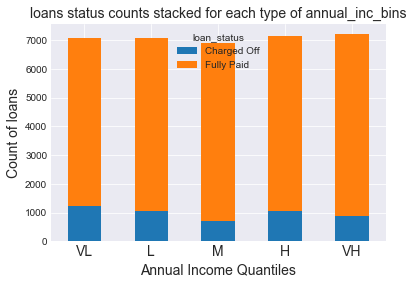

<Figure size 1080x720 with 0 Axes>

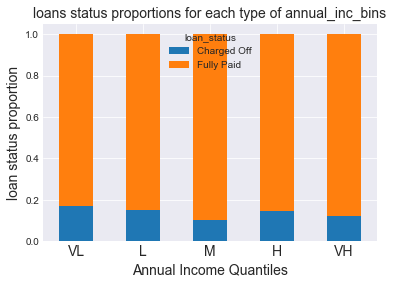


Percentage of default for each category
annual_inc_bins
VL    17.22
L     15.15
M     10.51
H     14.59
VH    12.35
dtype: float64


In [68]:
cat_analysis(df_slice,'annual_inc_bins','Annual Income Quantiles',0)

Key takeaway: When isolated by 20 percentile bins, the income range 51000-66000 seems to have very low, i.e. about 11% default rate

--------------
<br>Column: verification_status<br>
Indicates if income was verified by LC, not verified, or if the income source was verified

Category distribution against each type of loan status

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                1769       13069
Source Verified             1322        7842
Verified                    1851        9512

Plots


<Figure size 1080x720 with 0 Axes>

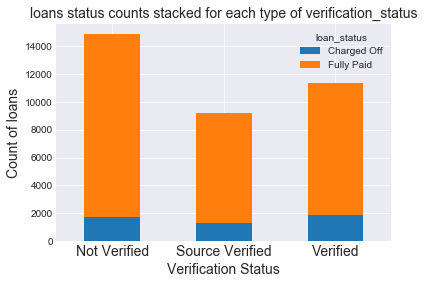

<Figure size 1080x720 with 0 Axes>

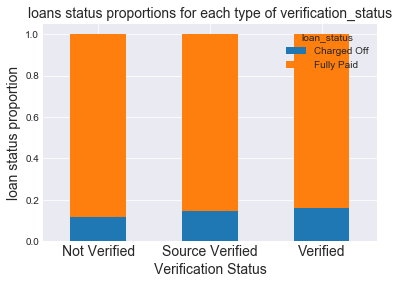


Percentage of default for each category
verification_status
Not Verified       11.92
Source Verified    14.43
Verified           16.29
dtype: float64


In [69]:
#this is a categorical field
cat_analysis(compl_loan,'verification_status','Verification Status',0)#analysing with the help of function

Key takeaway: Seems like non-verfied customers have surprisingly better repayment rate than verified customers. Difference between verified and non-verfied borrower repayment percentage is 5%

--------------
<br>Column: issue_d<br>
The month which the loan was funded

In [70]:
#let's split the date into month and year to analyse seperately
#we will create a new subset dataframe with couple of additional fields representing month and year
issue_d_df=compl_loan.loc[:,['int_rate','loan_status', 'issue_d']]
issue_d_df['month']=issue_d_df['issue_d'].dt.month
issue_d_df['year']=issue_d_df['issue_d'].dt.year
#creating a couple of dataframes with counts of statuses, one for each month and and one for each year
month_table = pd.pivot_table(issue_d_df, values='int_rate', index=['month'],
                    columns=['loan_status'], aggfunc='count')#int_rate is used so that we can calculate count wrt to it
year_table = pd.pivot_table(issue_d_df, values='int_rate', index=['year'],
                    columns=['loan_status'], aggfunc='count')#int_rate is used so that we can calculate count wrt to it

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
month                               
1                    257        1791
2                    220        1800
3                    289        2106
4                    341        2328
5                    423        2322
6                    429        2548
7                    433        2682
8                    427        2759
9                    496        2780
10                   511        2925
11                   517        3161
12                   599        3221

Plots


<Figure size 1080x720 with 0 Axes>

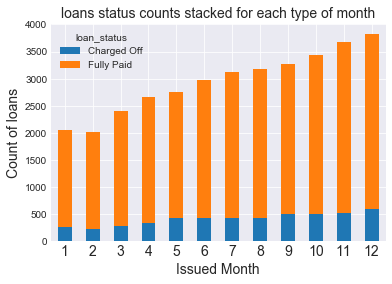

<Figure size 1080x720 with 0 Axes>

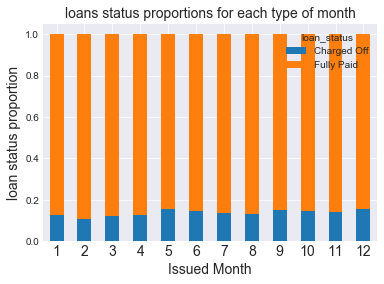


Percentage of default for each category
month
1     12.55
2     10.89
3     12.07
4     12.78
5     15.41
6     14.41
7     13.90
8     13.40
9     15.14
10    14.87
11    14.06
12    15.68
dtype: float64


In [71]:
#month based analysis
cat_analysis(issue_d_df,'month','Issued Month',0)#analysing with the help of function
#seems like loans issued in february have lower default rates, overall, months dont see to make much impact on repayment rate

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
year                                
2007                   1           3
2008                 160         893
2009                 541        3882
2010                1309        9486
2011                2931       16159

Plots


<Figure size 1080x720 with 0 Axes>

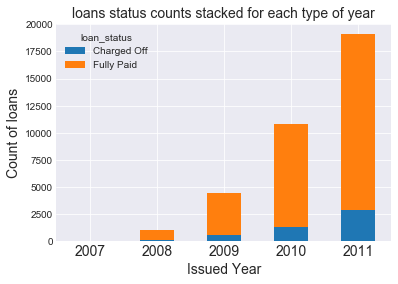

<Figure size 1080x720 with 0 Axes>

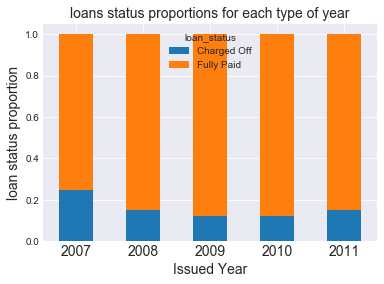


Percentage of default for each category
year
2007    25.00
2008    15.19
2009    12.23
2010    12.13
2011    15.35
dtype: float64


In [72]:
#year based analysis
cat_analysis(issue_d_df,'year','Issued Year',0)#analysing with the help of function
#seems like loans issued in 2007 have very high default rates, but we should consider the global recession in 2008 that might have affected them. For other years, we dont see much difference.

Key takeaway: Loans issued in february seems to be the most promising with lowest default percentage. But last 4 months have a bithigher default ratio.

--------------
<br>Column: loan_status<br>
Current status of the loan<br>


In [73]:
#this is the column wrt which we do all the analysis
vc=compl_loan.loan_status.value_counts()#we removed current loans, so we will see only 2 categories
print(vc)
print(round(100*vc[1]/vc.sum(),2))#abount 13.97% loans ended up in charge offs

Fully Paid     30423
Charged Off     4942
Name: loan_status, dtype: int64
13.97


Key takeaway: Abount 13.97% loans ended up in charge offs

--------------
<br>Column: purpose<br>
A category provided by the borrower for the loan request. 


Category distribution against each type of loan status

loan_status         Charged Off  Fully Paid
purpose                                    
car                         149        1246
credit_card                 479        4147
debt_consolidation         2508       14401
educational                  45         231
home_improvement            296        2318
house                        52         278
major_purchase              190        1783
medical                      95         527
moving                       79         444
other                       546        2916
renewable_energy             15          72
small_business              356         995
vacation                     49         283
wedding                      83         782

Plots


<Figure size 1080x720 with 0 Axes>

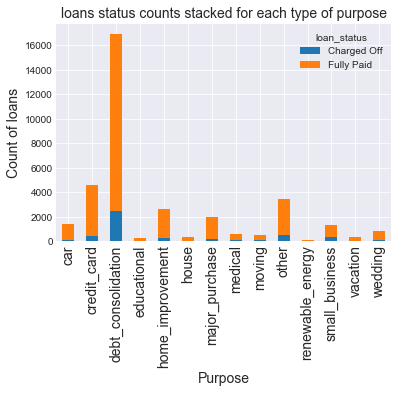

<Figure size 1080x720 with 0 Axes>

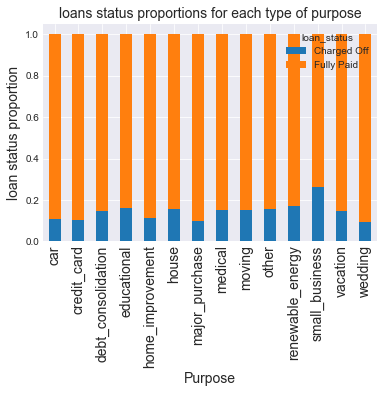


Percentage of default for each category
purpose
car                   10.68
credit_card           10.35
debt_consolidation    14.83
educational           16.30
home_improvement      11.32
house                 15.76
major_purchase         9.63
medical               15.27
moving                15.11
other                 15.77
renewable_energy      17.24
small_business        26.35
vacation              14.76
wedding                9.60
dtype: float64


In [74]:
#this is a categorical field
cat_analysis(compl_loan, 'purpose','Purpose',90)#analysing with the help of function

Key takeaway: 26% of the borrowers who selected small_business as a purpose are defaulting. Next is renewable_energy at 17%, but renewable energy has very few entries to jump to any conclusions. debt_consolidation is the most common purpose of taking loan but it's default percentage is almost same as that of population.

--------------
<br>Column: addr_state<br>
The state provided by the borrower in the loan application


In [75]:
compl_loan.addr_state.value_counts().count()#there are 48 states in the list
#considering only top 20 states because others have lesser entries
st_df=compl_loan.loc[compl_loan['addr_state'].isin(compl_loan.addr_state.value_counts().index.tolist()[:20])]

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
addr_state                          
AZ                   106         652
CA                   976        5420
CO                    80         602
CT                    78         576
FL                   437        2098
GA                   194        1059
IL                   187        1194
MA                   139        1042
MD                   140         810
MI                    89         552
MN                    72         482
MO                    95         514
NC                    98         574
NJ                   256        1411
NY                   438        2948
OH                   138         958
PA                   160        1213
TX                   273        2180
VA                   161        1098
WA                   110         610

Plots


<Figure size 1080x720 with 0 Axes>

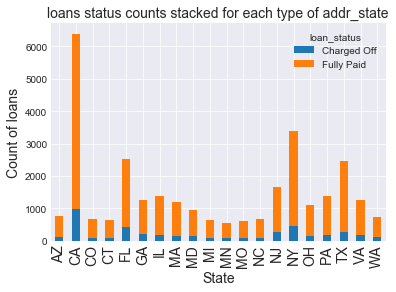

<Figure size 1080x720 with 0 Axes>

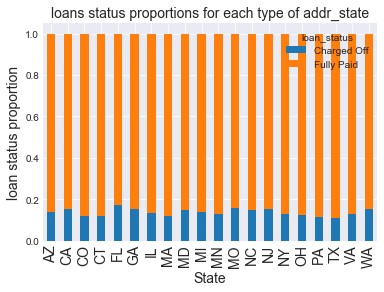


Percentage of default for each category
addr_state
AZ    13.98
CA    15.26
CO    11.73
CT    11.93
FL    17.24
GA    15.48
IL    13.54
MA    11.77
MD    14.74
MI    13.88
MN    13.00
MO    15.60
NC    14.58
NJ    15.36
NY    12.94
OH    12.59
PA    11.65
TX    11.13
VA    12.79
WA    15.28
dtype: float64


In [76]:
#this is a categorical field
cat_analysis(st_df, 'addr_state','State',90)#analysing with the help of function

Key takeaway: Florida has a default rate of about 17% which is significantly higher than other states.

--------------
<br>Column: dti<br>
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


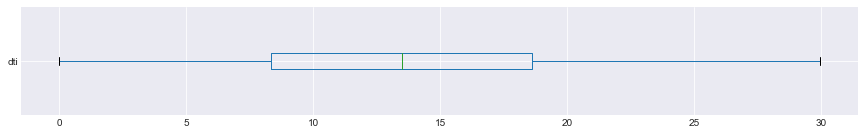

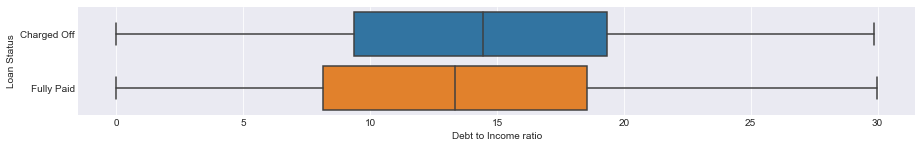

In [77]:
compl_loan.dti.head()#this is a continous field, don't see any outliers
#performing univariate and bivariate analysis(w.r.t loan status) for continous variables with box plots
uni_bi(compl_loan,compl_loan.dti,'dti','Debt to Income ratio')
#we dont see much difference in these distributions
#it's better to convert dti to sections/bins to better understand proportion of default for each section

In [78]:
#converting dti into bins(very low to very high, changing for every 20%) for better understanding
compl_loan['dti_bins'], D2I_bins = pd.cut(compl_loan.dti, bins=5, labels=['VL','L','M','H','VH'], retbins=True)
D2I_bins#ranges over which bins are spread between minimum and maximum


array([-0.02999,  5.998  , 11.996  , 17.994  , 23.992  , 29.99   ])

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
dti_bins                            
VL                   635        4973
L                   1552        8982
M                   1350        6974
H                   1170        8146
VH                   235        1348

Plots


<Figure size 1080x720 with 0 Axes>

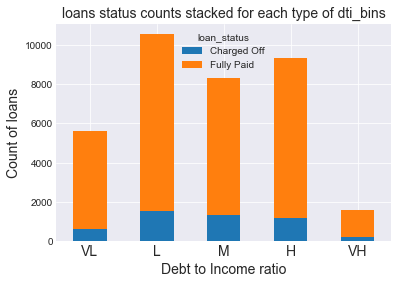

<Figure size 1080x720 with 0 Axes>

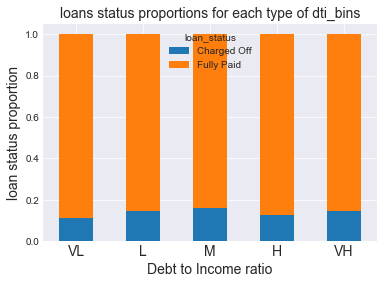


Percentage of default for each category
dti_bins
VL    11.32
L     14.73
M     16.22
H     12.56
VH    14.85
dtype: float64


In [79]:
cat_analysis(compl_loan,'dti_bins','Debt to Income ratio',0)

Key takeaway: Loan repayment ratio doesnt seem to follow any pattern even as the dti increases. But default percentage is high at 16% for dti in the range 12 to 18

--------------
<br>Column: delinq_2yrs<br>
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
delinq_2yrs                         
0                 4354.0     27177.0
1                  433.0      2506.0
2                  112.0       502.0
3                   25.0       164.0
4                   12.0        41.0
5                    3.0        18.0
6                    1.0         9.0
7                    1.0         3.0
8                    1.0         1.0
9                    NaN         1.0
11                   NaN         1.0

Plots


<Figure size 1080x720 with 0 Axes>

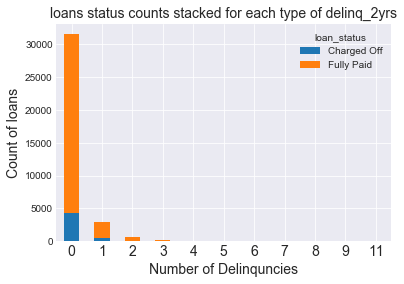

<Figure size 1080x720 with 0 Axes>

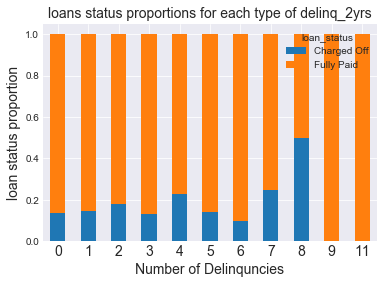


Percentage of default for each category
delinq_2yrs
0     13.81
1     14.73
2     18.24
3     13.23
4     22.64
5     14.29
6     10.00
7     25.00
8     50.00
9       NaN
11      NaN
dtype: float64


In [80]:
#this is a categorical field
cat_analysis(compl_loan,'delinq_2yrs','Number of Delinquncies',0)#analysing with the help of function

In [81]:
#default rates with delinquency(>0) and  without(==0)
df_del=compl_loan.loc[:,['int_rate','loan_status','delinq_2yrs']]
df_del['Y/N']=(df_del.delinq_2yrs==0)
count_table = pd.pivot_table(df_del, values='int_rate', index=['Y/N'],
                    columns=['loan_status'], aggfunc='count')#int_rate is used so that we can calculate count wrt to it
print(round(count_table['Charged Off']/count_table.sum(axis=1)*100,2))

Y/N
False    15.34
True     13.81
dtype: float64


Key takeaway: There is a slightly greater chance of default for borrowers with one or more delinquncy. But nothing significant.

--------------
<br>Column: earliest_cr_line<br>
The month the borrower's earliest reported credit line was opened

In [82]:
#let's extract year to analyse based on it
#we will create a new subset dataframe with an of additional field representing year
earliest_cr_line_df=compl_loan.loc[:,['int_rate','loan_status', 'earliest_cr_line']]
earliest_cr_line_df['year']=earliest_cr_line_df['earliest_cr_line'].dt.year
#creating a dataframe with counts of statuses for each year

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
year                                
1946                 NaN         1.0
1950                 NaN         1.0
1954                 NaN         1.0
1956                 NaN         1.0
1962                 1.0         2.0
1963                 NaN         4.0
1964                 NaN         2.0
1965                 1.0         4.0
1966                 NaN         7.0
1967                 3.0         9.0
1968                 4.0         8.0
1969                 1.0        21.0
1970                 4.0        31.0
1971                 3.0        30.0
1972                 5.0        24.0
1973                 7.0        32.0
1974                 4.0        45.0
1975                 6.0        51.0
1976                 3.0        67.0
1977                 9.0        78.0
1978                14.0       112.0
1979                28.0       105.0
1980                10.0       135.0
1981               

<Figure size 1080x720 with 0 Axes>

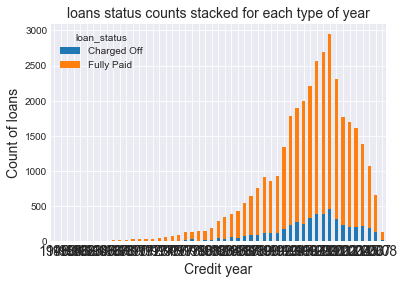

<Figure size 1080x720 with 0 Axes>

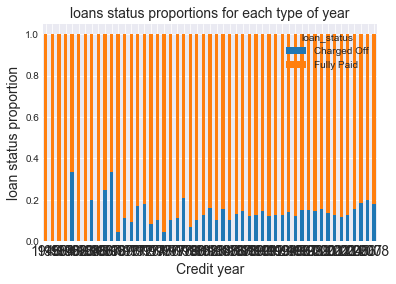


Percentage of default for each category
year
1946      NaN
1950      NaN
1954      NaN
1956      NaN
1962    33.33
1963      NaN
1964      NaN
1965    20.00
1966      NaN
1967    25.00
1968    33.33
1969     4.55
1970    11.43
1971     9.09
1972    17.24
1973    17.95
1974     8.16
1975    10.53
1976     4.29
1977    10.34
1978    11.11
1979    21.05
1980     6.90
1981    10.07
1982    12.77
1983    15.96
1984    10.32
1985    15.58
1986    10.28
1987    12.99
1988    14.77
1989    12.19
1990    12.57
1991    14.54
1992    12.18
1993    12.92
1994    12.89
1995    14.35
1996    12.43
1997    15.04
1998    14.91
1999    14.58
2000    15.48
2001    13.73
2002    12.94
2003    11.60
2004    12.76
2005    15.71
2006    18.31
2007    20.00
2008    17.99
dtype: float64


In [83]:
#this is a categorical field
cat_analysis(earliest_cr_line_df,'year','Credit year',0)#analysing with the help of function

Key takeaway: Even though the default rates look at bit higher for those that got the credit line opened in the most recent years, it should be noted that most of credit lines are opened in the recent years and heance ignoring them can cause business loss.

--------------
<br>Column: inq_last_6mths<br>
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

Category distribution against each type of loan status

loan_status     Charged Off  Fully Paid
inq_last_6mths                         
0                      2006       15177
1                      1488        8286
2                       827        4380
3                       540        2162
4                        35         245
5                        22         101
6                        14          40
7                         8          23
8                         2           9

Plots


<Figure size 1080x720 with 0 Axes>

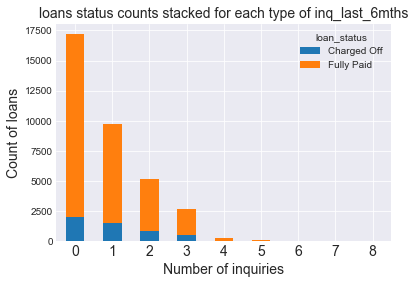

<Figure size 1080x720 with 0 Axes>

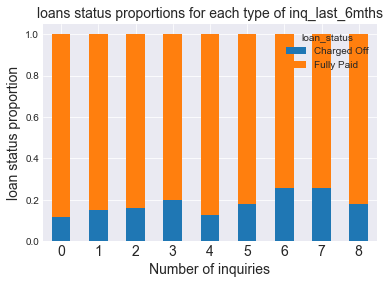


Percentage of default for each category
inq_last_6mths
0    11.67
1    15.22
2    15.88
3    19.99
4    12.50
5    17.89
6    25.93
7    25.81
8    18.18
dtype: float64


In [84]:
#this is a categorical field
cat_analysis(compl_loan,'inq_last_6mths','Number of inquiries',0)#analysing with the help of function

Key takeaway: As the number of inquiries increases, the percentage of defaulting also seems to increase. Infact, those without any inquiries have the lowest default rates.

--------------
<br>Column: open_acc<br>
The number of open credit lines in the borrower's credit file.

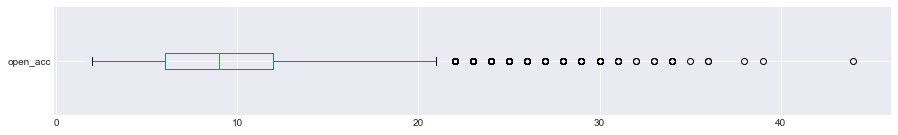

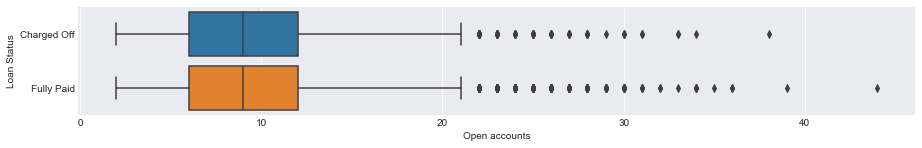

In [85]:
compl_loan.funded_amnt.head()#this is a continous field, don't see any outliers
#performing univariate and bivariate analysis(w.r.t loan status) for continous variables with box plots
uni_bi(compl_loan,compl_loan.open_acc,'open_acc','Open accounts')
#we dont see much difference in these distributions
#it's better to convert open_acc to sections/bins to better understand proportion of default for each section


In [86]:
#converting open_acc into bins(very low to very high, changing for every 20%) for better understanding
compl_loan['open_acc_bins'], oa_bins = pd.cut(compl_loan.open_acc, bins=5, labels=['VL','L','M','H','VH'], retbins=True)
oa_bins#ranges over which bins are spread between minimum and maximum


array([ 1.958, 10.4  , 18.8  , 27.2  , 35.6  , 44.   ])

Category distribution against each type of loan status

loan_status    Charged Off  Fully Paid
open_acc_bins                         
VL                    3284       20155
L                     1465        9173
M                      179        1041
H                       13          50
VH                       1           4

Plots


<Figure size 1080x720 with 0 Axes>

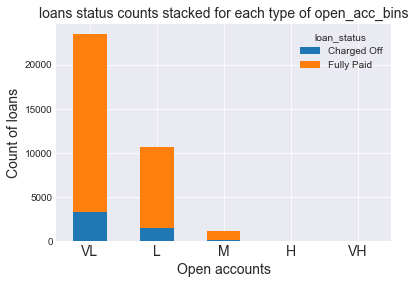

<Figure size 1080x720 with 0 Axes>

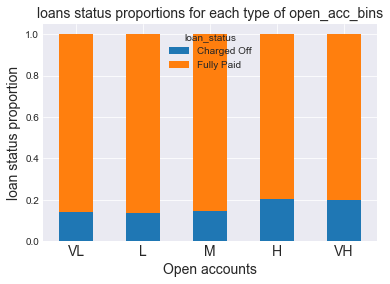


Percentage of default for each category
open_acc_bins
VL    14.01
L     13.77
M     14.67
H     20.63
VH    20.00
dtype: float64


In [87]:
cat_analysis(compl_loan,'open_acc_bins','Open accounts',0)

Key takeaway: There is no difference in default rate upto 27 credit lines. Beyond that, there are very few samples to make conclusions. This doesnt seem like a significant feature for default rates.

--------------
<br>Column: pub_rec<br>
Number of derogatory public records

Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
pub_rec                             
0                 4545.0     28971.0
1                  387.0      1409.0
2                   10.0        34.0
3                    NaN         7.0
4                    NaN         2.0

Plots


<Figure size 1080x720 with 0 Axes>

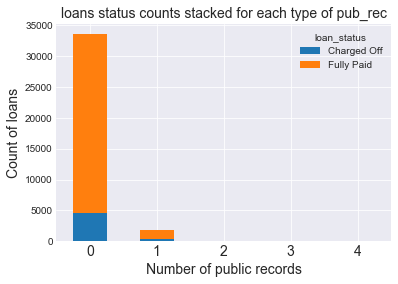

<Figure size 1080x720 with 0 Axes>

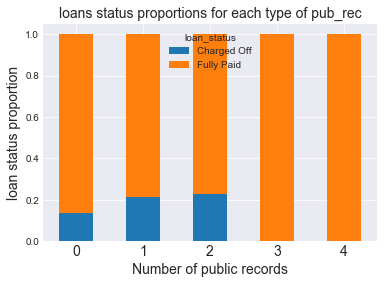


Percentage of default for each category
pub_rec
0    13.56
1    21.55
2    22.73
3      NaN
4      NaN
dtype: float64


In [88]:
#this is a categorical field
cat_analysis(compl_loan,'pub_rec','Number of public records',0)#analysing with the help of function

In [89]:
#default rates with public records(>0) and  without(==0)
df_pub=compl_loan.loc[:,['int_rate','loan_status','pub_rec']]
df_pub['Y/N']=(df_pub.pub_rec!=0)
count_table = pd.pivot_table(df_pub, values='int_rate', index=['Y/N'],
                    columns=['loan_status'], aggfunc='count')#int_rate is used so that we can calculate count wrt to it
print(round(count_table['Charged Off']/count_table.sum(axis=1)*100,2))


Y/N
False    13.56
True     21.47
dtype: float64


Key takeaway: There is a significant difference between default rates of borrowers with and without public records. As much as 8%

--------------
<br>Column: revol_bal<br>
Total credit revolving balance

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: revol_util<br>
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: total_acc<br>
The total number of credit lines currently in the borrower's credit file

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: out_prncp<br>
Remaining outstanding principal for total amount funded

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: total_pymnt<br>
Payments received to date for total amount funded

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: total_rec_prncp<br>
Principal received to date

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: total_rec_int<br>
Interest received to date

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: total_rec_late_fee<br>
Late fees received to date

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: recoveries<br>
post charge off gross recovery

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: collection_recovery_fee<br>
post charge off collection fee

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: last_pymnt_d<br>
Last month payment was received

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: last_pymnt_amnt<br>
Last total payment amount received

<br>This is calculated after the loan is approved, and hence cannot be useful for our analysis

--------------
<br>Column: last_credit_pull_d<br>
The most recent month LC pulled credit for this loan

In [90]:
#let's extract year to analyse based on it
#we will create a new subset dataframe with an of additional field representing year
last_credit_pull_d_df=compl_loan.loc[:,['int_rate','loan_status', 'last_credit_pull_d']]
last_credit_pull_d_df['year']=last_credit_pull_d_df['last_credit_pull_d'].dt.year


Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
year                                
2008                 NaN        19.0
2009                27.0       118.0
2010               116.0       515.0
2011               312.0      1590.0
2012               724.0      3018.0
2013               838.0      3934.0
2014               541.0      5178.0
2015               273.0      4865.0
2016              2111.0     11186.0

Plots


<Figure size 1080x720 with 0 Axes>

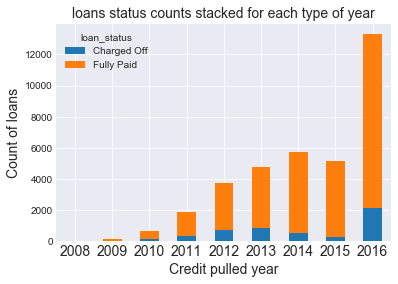

<Figure size 1080x720 with 0 Axes>

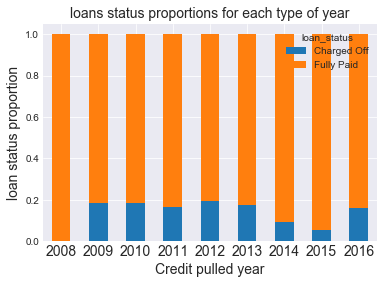


Percentage of default for each category
year
2008      NaN
2009    18.62
2010    18.38
2011    16.40
2012    19.35
2013    17.56
2014     9.46
2015     5.31
2016    15.88
dtype: float64


In [91]:
#this is a categorical field
cat_analysis(last_credit_pull_d_df,'year','Credit pulled year',0)#analysing with the help of function

Key takeaway: Credit pull year doesnt show any impact on default rates. There is no pattern in default rates as credit pulled dates draw closer

--------------
<br>Column: pub_rec_bankruptcies<br>
Number of public record bankruptcies

Category distribution against each type of loan status

loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                          4630       29268
1.0                           310        1152
2.0                             2           3

Plots


<Figure size 1080x720 with 0 Axes>

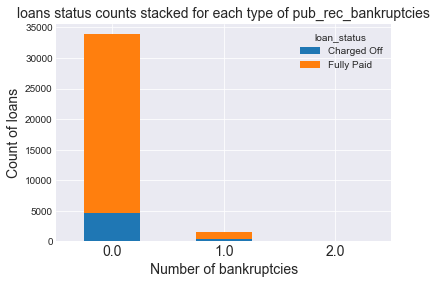

<Figure size 1080x720 with 0 Axes>

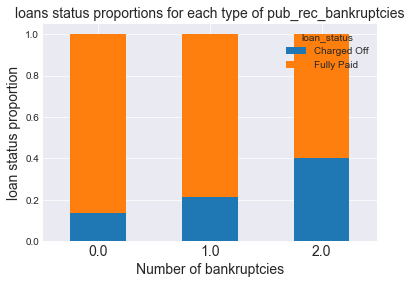


Percentage of default for each category
pub_rec_bankruptcies
0.0    13.66
1.0    21.20
2.0    40.00
dtype: float64


In [92]:
#this is a categorical field
cat_analysis(compl_loan,'pub_rec_bankruptcies','Number of bankruptcies',0)#analysing with the help of function

Key takeaway: Borrowers with publicly recorded bankruptcies are more likely to default. Difference between 0 and 1 bankruptcy is about 7%

### ---------------------------------------------End of Data Analysis - Part 1-----------------------------------------------------

### --------------------------------------------------Data Analysis - Part 2----------------------------------------------------------

Now that we performed bivariate analysis of all columns, let's see how combinations of important columns affect default rates.<br>
Columns that we considered for this analysis are the ones that showed clear difference in default rates for various segments/bins. List below:<br>
term<br>
grade(we will not consider sub-grade as that has too much diversity)<br>
inq_last_6mths<br>
pub_rec<br>
pub_rec_bankruptcies<br><br>
We didnt consider pupose of this analysis as it has too many categories


<b>term vs grade vs loan_status</b>

---------------------------------------------
Default rates of grades for term:   60 months
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                     33         337
B                    405        1815
C                    461        1514
D                    497        1266
E                    501        1201
F                    242         485
G                     74         159

Plots


<Figure size 1080x720 with 0 Axes>

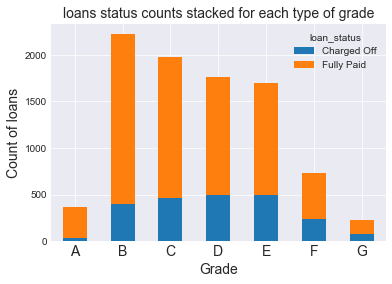

<Figure size 1080x720 with 0 Axes>

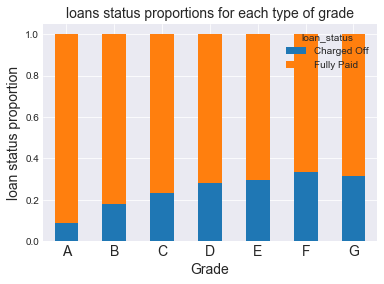


Percentage of default for each category
grade
A     8.92
B    18.24
C    23.34
D    28.19
E    29.44
F    33.29
G    31.76
dtype: float64
---------------------------------------------
Default rates of grades for term:   36 months
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                    480        8290
B                    848        7650
C                    708        4497
D                    483        2416
E                    147         632
F                     44         131
G                     19          30

Plots


<Figure size 1080x720 with 0 Axes>

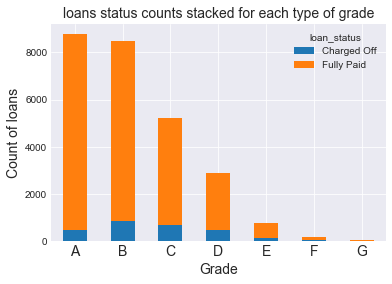

<Figure size 1080x720 with 0 Axes>

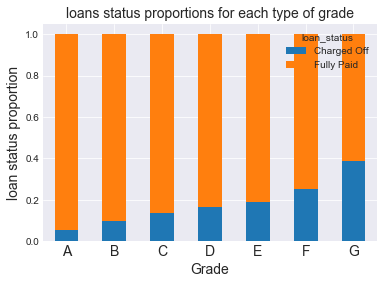


Percentage of default for each category
grade
A     5.47
B     9.98
C    13.60
D    16.66
E    18.87
F    25.14
G    38.78
dtype: float64


In [93]:
for term_name in compl_loan.term.unique():
    print("---------------------------------------------")
    print("Default rates of grades for term: ",term_name)
    print("---------------------------------------------")
    sub_set=compl_loan.loc[compl_loan.term==term_name]
#    print(sub_set.term.unique())
    cat_analysis(sub_set,'grade','Grade',0)#analysing with the help of function

Conclusion: There is no combination between term and grade that has significant default rate over others.

<b>inq_last_6mths vs grade vs loan_status</b>

---------------------------------------------
Default rates of purpose for number of inquiries:  Zero
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                    267        5115
B                    611        5117
C                    367        2246
D                    359        1585
E                    267         785
F                     99         246
G                     36          83

Plots


<Figure size 1080x720 with 0 Axes>

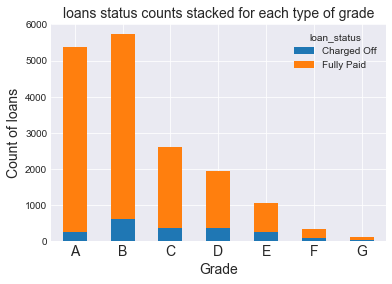

<Figure size 1080x720 with 0 Axes>

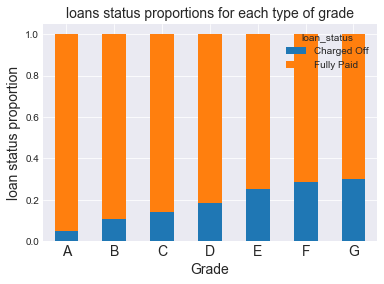


Percentage of default for each category
grade
A     4.96
B    10.67
C    14.05
D    18.47
E    25.38
F    28.70
G    30.25
dtype: float64
---------------------------------------------
Default rates of purpose for number of inquiries:  Non-Zero
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                    246        3512
B                    642        4348
C                    802        3765
D                    621        2097
E                    381        1048
F                    187         370
G                     57         106

Plots


<Figure size 1080x720 with 0 Axes>

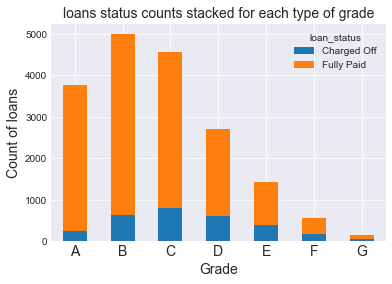

<Figure size 1080x720 with 0 Axes>

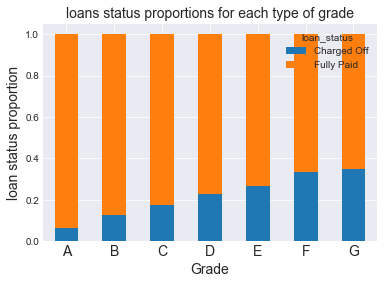


Percentage of default for each category
grade
A     6.55
B    12.87
C    17.56
D    22.85
E    26.66
F    33.57
G    34.97
dtype: float64


In [94]:
for inq_name in ['Zero','Non-Zero']:
    print("---------------------------------------------")
    print("Default rates of purpose for number of inquiries: ",inq_name)
    print("---------------------------------------------")
    if inq_name=='Zero':
        sub_set=compl_loan.loc[compl_loan.inq_last_6mths==0]
    else:
        sub_set=compl_loan.loc[compl_loan.inq_last_6mths!=0]
#    print(sub_set.term.unique())
    cat_analysis(sub_set,'grade','Grade',0)#analysing with the help of function

Conclusion: There is no combination between inq_last_6mths and grade that has significant default rate over others.

<b>pub_rec vs grade vs loan_status</b>

---------------------------------------------
Default rates of purpose for number of public records:  Zero
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                    504        8508
B                   1180        8974
C                   1062        5596
D                    885        3437
E                    583        1706
F                    253         569
G                     78         181

Plots


<Figure size 1080x720 with 0 Axes>

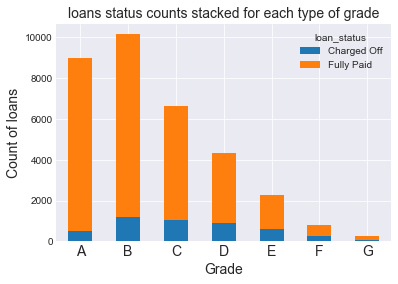

<Figure size 1080x720 with 0 Axes>

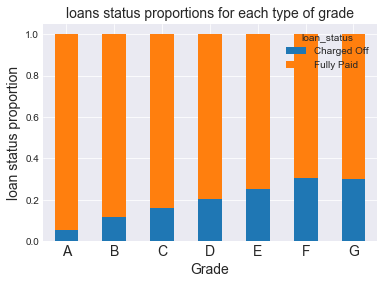


Percentage of default for each category
grade
A     5.59
B    11.62
C    15.95
D    20.48
E    25.47
F    30.78
G    30.12
dtype: float64
---------------------------------------------
Default rates of purpose for number of public records:  Non-Zero
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                      9         119
B                     73         491
C                    107         415
D                     95         245
E                     65         127
F                     33          47
G                     15           8

Plots


<Figure size 1080x720 with 0 Axes>

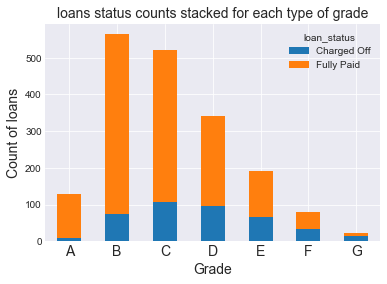

<Figure size 1080x720 with 0 Axes>

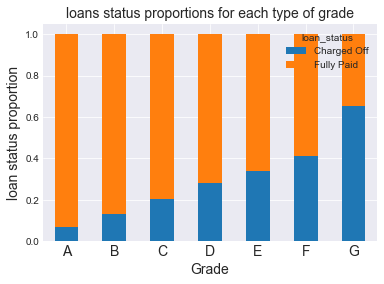


Percentage of default for each category
grade
A     7.03
B    12.94
C    20.50
D    27.94
E    33.85
F    41.25
G    65.22
dtype: float64


In [95]:
for p_rec in ['Zero','Non-Zero']:
    print("---------------------------------------------")
    print("Default rates of purpose for number of public records: ",p_rec)
    print("---------------------------------------------")
    if p_rec=='Zero':
        sub_set=compl_loan.loc[compl_loan.pub_rec==0]
    else:
        sub_set=compl_loan.loc[compl_loan.pub_rec!=0]
#    print(sub_set.term.unique())
    cat_analysis(sub_set,'grade','Grade',0)#analysing with the help of function

Conclusion: Those with atleast one public record and belonging to Grade G have very high default rate.

<b>pub_rec_bankruptcies vs grade vs loan_status</b>

---------------------------------------------
Default rates of purpose for number of public record bankruptcies:  Zero
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                    506        8525
B                   1195        9055
C                   1090        5682
D                    905        3505
E                    593        1736
F                    259         582
G                     82         183

Plots


<Figure size 1080x720 with 0 Axes>

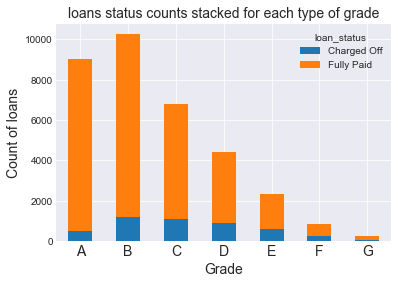

<Figure size 1080x720 with 0 Axes>

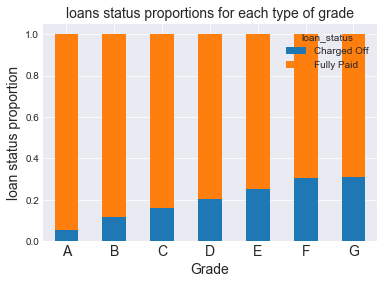


Percentage of default for each category
grade
A     5.60
B    11.66
C    16.10
D    20.52
E    25.46
F    30.80
G    30.94
dtype: float64
---------------------------------------------
Default rates of purpose for number of public record bankruptcies:  Non-Zero
---------------------------------------------
Category distribution against each type of loan status

loan_status  Charged Off  Fully Paid
grade                               
A                      7         102
B                     58         410
C                     79         329
D                     75         177
E                     55          97
F                     27          34
G                     11           6

Plots


<Figure size 1080x720 with 0 Axes>

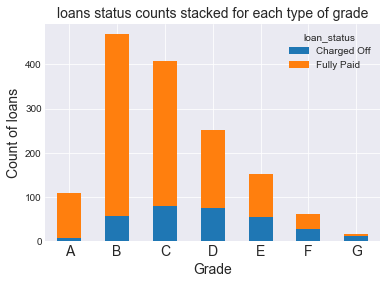

<Figure size 1080x720 with 0 Axes>

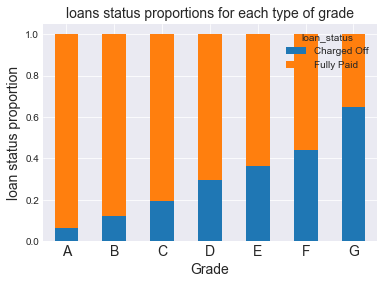


Percentage of default for each category
grade
A     6.42
B    12.39
C    19.36
D    29.76
E    36.18
F    44.26
G    64.71
dtype: float64


In [96]:
for p_r_bankruptcies in ['Zero','Non-Zero']:
    print("---------------------------------------------")
    print("Default rates of purpose for number of public record bankruptcies: ",p_r_bankruptcies)
    print("---------------------------------------------")
    if p_r_bankruptcies=='Zero':
        sub_set=compl_loan.loc[compl_loan.pub_rec_bankruptcies==0]
    else:
        sub_set=compl_loan.loc[compl_loan.pub_rec_bankruptcies!=0]
#    print(sub_set.term.unique())
    cat_analysis(sub_set,'grade','Grade',0)#analysing with the help of function

Conclusion: Those with atleast one public record of bankruptcy and belonging to Grade G have very high default rate.

### ---------------------------------------------End of Data Analysis - Part 2----------------------------------------------------------